In [23]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt
from __future__ import division
import time

In [24]:
data = pd.read_csv('energyConsumption.csv')
data

,Primary Energy Consumed by the Residential Sector,Total Energy Consumed by the Residential Sector,Primary Energy Consumed by the Commercial Sector,Total Energy Consumed by the Commercial Sector,Primary Energy Consumed by the Industrial Sector,Total Energy Consumed by the Industrial Sector,Primary Energy Consumed by the Transportation Sector,Total Energy Consumed by the Transportation Sector,Primary Energy Consumed by the Electric Power Sector
0,1313.816,1932.187,656.607,1079.310,2054.675,2701.524,1506.380,1509.552,1691.096
1,1150.011,1687.255,621.766,1001.920,1869.459,2460.752,1439.361,1442.127,1511.458
2,970.362,1497.067,490.154,884.437,1944.295,2579.613,1561.162,1564.016,1559.159
3,709.631,1177.661,362.003,735.461,1924.207,2550.210,1479.971,1482.632,1470.152
4,544.596,1015.008,289.109,696.114,2070.447,2741.810,1621.585,1624.436,1551.631
5,385.648,933.663,227.897,687.473,1942.080,2641.221,1540.532,1543.553,1709.752
6,326.179,981.183,197.526,693.949,1999.819,2691.487,1583.965,1587.202,1846.331
7,338.036,1018.978,206.942,706.301,2111.198,2817.613,1646.394,1649.550,1889.873
8,361.672,956.550,210.244,651.041,2035.699,2661.997,1502.988,1505.857,1664.842
9,461.932,991.668,266.381,693.462,2232.462,2911.515,1577.804,1580.742,1638.807


In [25]:
data.head()

,Primary Energy Consumed by the Residential Sector,Total Energy Consumed by the Residential Sector,Primary Energy Consumed by the Commercial Sector,Total Energy Consumed by the Commercial Sector,Primary Energy Consumed by the Industrial Sector,Total Energy Consumed by the Industrial Sector,Primary Energy Consumed by the Transportation Sector,Total Energy Consumed by the Transportation Sector,Primary Energy Consumed by the Electric Power Sector
0,1313.816,1932.187,656.607,1079.310,2054.675,2701.524,1506.380,1509.552,1691.096
1,1150.011,1687.255,621.766,1001.920,1869.459,2460.752,1439.361,1442.127,1511.458
2,970.362,1497.067,490.154,884.437,1944.295,2579.613,1561.162,1564.016,1559.159
3,709.631,1177.661,362.003,735.461,1924.207,2550.210,1479.971,1482.632,1470.152
4,544.596,1015.008,289.109,696.114,2070.447,2741.810,1621.585,1624.436,1551.631


In [26]:
data = data.values
y = np.zeros([data.shape[0],1])
y[:,0] = data[:, 2]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((436, 9), (109, 9), (436, 1), (109, 1))

In [28]:
newColumn = np.ones((data.shape[0],1))
data = np.append(newColumn,data, axis = 1)
data.shape

(545, 10)

In [29]:
X = np.zeros([data.shape[0],data.shape[1]-1])
X[:, 0] = data[:, 0]
X[:, 1] = data[:, 1]
X[:, 2] = data[:, 3]
X[:, 3] = data[:, 4]
X[:, 4] = data[:, 5]
X[:, 5] = data[:, 6]
X[:, 6] = data[:, 7]
X[:, 7] = data[:, 8]
X[:, 8] = data[:, 9]
thetas = np.zeros([1,X.shape[1]])
X.shape, y.shape, thetas.shape

((545, 9), (545, 1), (1, 9))

Text(0.5,0,'Primary Energy Consumed by the Residential Sector')

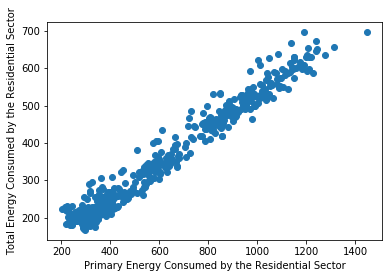

In [30]:
#Scikit learn
X_axis = data[:,1:10]
model = LinearRegression()
model.fit(X_axis,y)
pred = model.predict(X_axis)
model.coef_, model.intercept_
plt.scatter(X[:,1][np.newaxis],y)
plt.ylabel('Total Energy Consumed by the Residential Sector')
plt.xlabel('Primary Energy Consumed by the Residential Sector')

[[0.46251607]] [70.1787545]


Text(0.5,0,'Primary Energy Consumed by the Residential Sector')

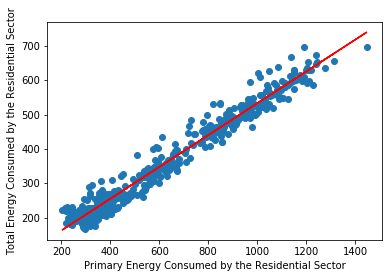

In [31]:
x_axis = X[:,1]
x_axis = x_axis[:,np.newaxis]
model = LinearRegression()
model.fit(x_axis,y)
pred = model.predict(x_axis)
print(model.coef_, model.intercept_)
plt.scatter(x_axis,y)
plt.plot(x_axis,pred, color = 'red')
plt.ylabel('Total Energy Consumed by the Residential Sector')
plt.xlabel('Primary Energy Consumed by the Residential Sector')

In [32]:
#Cost Function
def calcVectorizedCost(X, y, theta): 
    n = y.shape[0]
    diff = (np.dot(X,theta.T)-y)
    cost = 1/(2*n) * np.sum(diff**2)
    return cost

In [33]:
calcVectorizedCost(X,y,thetas)

68667.6471191734

In [34]:
#Gradient Descent
def gradientDescent(X, y, theta, alpha, iters):
    n = y.shape[0]
    for i in range (iters):
        A = np.dot(X,theta.T)
        theta = theta - alpha*(1/n)*np.dot(X.T, A - y).T
    cost = calcVectorizedCost(X, y, theta)
    return theta, cost

In [35]:
gradientDescent(X,y,thetas,0.01,0)

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]]), 68667.6471191734)

Cost after  100000  iterations:  10.037507141065907
Cost after  200000  iterations:  2.425571686160765
Cost after  300000  iterations:  0.5861436006648982
Cost after  400000  iterations:  0.1416429703383256
Cost after  500000  iterations:  0.034228707833991574
Cost after  600000  iterations:  0.00827188527230118
Cost after  700000  iterations:  0.001999378528787007
Cost after  800000  iterations:  0.0004836170199478035
Cost after  900000  iterations:  0.00011733032384627849
[[ 1.01572237e-03  4.68782054e-04  9.98612417e-01  4.29715108e-04
   9.10035841e-05 -3.51802253e-06  2.58025534e-03 -2.65537999e-03
  -1.18414897e-04]]


Text(0.5,0,'Iteration')

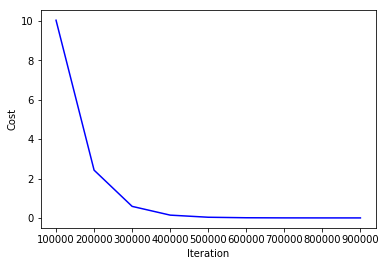

In [36]:
iterations = 1000000
x_axis = list()
y_axis = list()
for i in range (100000,iterations,100000):
    theta, cost= gradientDescent(X,y,thetas,0.00000007,i)
    print("Cost after " ,i, " iterations: " ,cost)
    x_axis.append(i)
    y_axis.append(cost)
plt.plot(x_axis,y_axis, color = 'blue')
print(theta)
plt.ylabel('Cost')
plt.xlabel('Iteration')

In [37]:
#Linear Regression
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(mean_squared_error(y_test, pred))
print(mean_squared_log_error(y_test,pred))
print(model.score(X_test, y_test))

5.216567814435889e-26
9.118942574114448e-31
1.0


In [38]:
#Neural Network
from keras import Sequential 
from keras import layers
from keras import optimizers
import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

In [39]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(1024, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1024)              10240     
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 699,393
Trainable params: 699,393
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = NN_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split = 0.2)

Train on 348 samples, validate on 88 samples
Epoch 1/100
348/348 [==============================] - 1s 3ms/step - loss: 132.2497 - mean_absolute_error: 132.2497 - val_loss: 71.6023 - val_mean_absolute_error: 71.6023
Epoch 2/100
348/348 [==============================] - 0s 894us/step - loss: 56.0668 - mean_absolute_error: 56.0668 - val_loss: 32.2637 - val_mean_absolute_error: 32.2637
Epoch 3/100
348/348 [==============================] - 0s 612us/step - loss: 25.6325 - mean_absolute_error: 25.6325 - val_loss: 13.5034 - val_mean_absolute_error: 13.5034
Epoch 4/100
348/348 [==============================] - 0s 568us/step - loss: 16.5512 - mean_absolute_error: 16.5512 - val_loss: 23.1811 - val_mean_absolute_error: 23.1811
Epoch 5/100
348/348 [==============================] - 0s 586us/step - loss: 15.3130 - mean_absolute_error: 15.3130 - val_loss: 11.2534 - val_mean_absolute_error: 11.2534
Epoch 6/100
348/348 [==============================] - 0s 589us/step - loss: 41.7320 - mean_absolute

Epoch 49/100
348/348 [==============================] - 0s 565us/step - loss: 10.4876 - mean_absolute_error: 10.4876 - val_loss: 13.7494 - val_mean_absolute_error: 13.7494
Epoch 50/100
348/348 [==============================] - 0s 544us/step - loss: 12.5631 - mean_absolute_error: 12.5631 - val_loss: 12.5817 - val_mean_absolute_error: 12.5817
Epoch 51/100
348/348 [==============================] - 0s 603us/step - loss: 9.7944 - mean_absolute_error: 9.7944 - val_loss: 8.8474 - val_mean_absolute_error: 8.8474
Epoch 52/100
348/348 [==============================] - 0s 600us/step - loss: 10.5375 - mean_absolute_error: 10.5375 - val_loss: 12.3999 - val_mean_absolute_error: 12.3999
Epoch 53/100
348/348 [==============================] - 0s 525us/step - loss: 11.6037 - mean_absolute_error: 11.6037 - val_loss: 17.7614 - val_mean_absolute_error: 17.7614
Epoch 54/100
348/348 [==============================] - 0s 530us/step - loss: 15.6580 - mean_absolute_error: 15.6580 - val_loss: 7.4476 - val_me

348/348 [==============================] - 0s 539us/step - loss: 6.2832 - mean_absolute_error: 6.2832 - val_loss: 6.1973 - val_mean_absolute_error: 6.1973
Epoch 98/100
348/348 [==============================] - 0s 638us/step - loss: 5.8942 - mean_absolute_error: 5.8942 - val_loss: 7.6207 - val_mean_absolute_error: 7.6207
Epoch 99/100
348/348 [==============================] - 0s 634us/step - loss: 9.0542 - mean_absolute_error: 9.0542 - val_loss: 5.7868 - val_mean_absolute_error: 5.7868
Epoch 100/100
348/348 [==============================] - 0s 602us/step - loss: 11.1453 - mean_absolute_error: 11.1453 - val_loss: 9.8249 - val_mean_absolute_error: 9.8249


Text(0.5,0,'epoch')

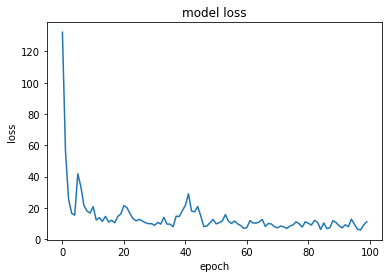

In [41]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [56]:
#SVR
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})
a = y_train.ravel()
svr.fit(X_train, a)
predict = svr.predict(X_test)
print(mean_squared_error(y_test, predict))
print(mean_squared_log_error(y_test,predict))
print(svr.score(X_test, y_test))

20784.45354538788
0.17343590781519685
-0.00025952365599213323
